In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('poster', font_scale=1.25)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from LB_D2Q9 import pipe_cython as lb

We now want to visualize the evolution of the flow...let's see how it goes...

In [6]:
from IPython import display

It's probably easier to specify dt and dr and the dimensions. Then get everything else from that...yeah. That way the velocity is on the scale of U ~ 0.1 or so.

In [11]:
#### Input to the simulation in SI. ######
diameter = 1. # meters
length = 4. # meters

deltaP = -10000000 # In pascal: kg/(m*s^2)

dr = 0.01
dt = .025

rho_fluid = 1000 # kg/m^3
viscosity = 10.**-6. # More viscous = easier to simulate!

##### Derived parameters ######
#mass_per_cell = rho_fluid*(dr**3)
#delta_P_simulation = deltaP/(mass_per_cell/(dr*dt**2)) # This has units
#print 'delta_P_simulation:' , delta_P_simulation

print 'Desired viscosity:' , viscosity
#Re = (input_velocity * diameter)/viscosity
#print 'Desired Re', Re

# Re is set by diameter, input_velocity, and viscosity
# Adjust dr so that mach number doers not explode!
print
print '###### Simulation Parameters #########'
print

# Solve for the desired omega...make sure it's in the correct range.


ly = int(np.ceil(diameter/dr))
lx = int(np.ceil(length/dr))
print 'ly', ly
print 'lx', lx

omega = .5 + (3*dt*viscosity)/(dr**2)

print 'omega:' , omega

assert (omega > 0.5) and (omega < 1)

sim = lb.Pipe_Flow(lx=lx, ly=ly, dr=dr, dt=dt, omega=omega, 
                   deltaP=deltaP, rho_fluid=rho_fluid)

print 'delta_p_sim:' , sim.deltaP_sim

# U should be on the order of 0.1, 0.2 in the simulation!
#print 'u_max in simulation:' , np.max(sim.u)

Desired viscosity: 1e-06

###### Simulation Parameters #########

ly 100
lx 400
omega: 0.50075
Viscosity: 1e-06
Re: None
Ma: None
delta_p_sim: -62500.0


KeyboardInterrupt: 

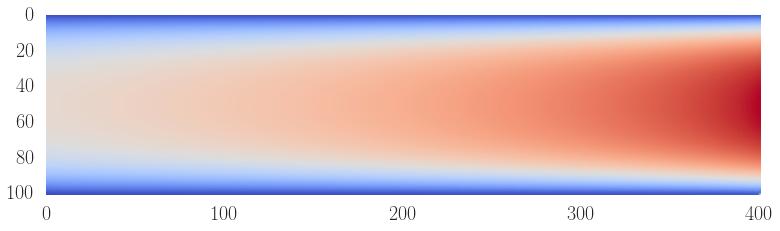

In [12]:
total_num_steps = 1000
steps_per_image= 20

num_to_record = int(np.ceil(float(total_num_steps)/steps_per_image))

plt.figure()
for i in range(num_to_record):
    print np.sum(sim.rho)/(sim.nx*sim.ny)
    
    mag = np.sqrt(sim.u**2 + sim.v**2)
    plt.imshow(mag.T, cmap = cm.coolwarm)
    plt.grid(False)
    #plt.clim(vmin=0, vmax=1.)
    #if i == 0:
    #    plt.colorbar()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    sim.run(steps_per_image)
plt.clf() # This way a second figure does not appear at the end...

Cool. Let's say that we have constant input on the left and constant output on the right. Well, perhaps we could try to study an obstacle...that would be cool. Well...let's think. What next? We could start writing the slow pieces in opencl...